In [6]:
import numpy as np
import pandas as pd

from pandas import DataFrame,Series

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
Main_df = pd.read_csv("new_data.csv")

In [8]:
sample_df = Main_df

In [9]:
sample_df.head(1)

,Trans_loan_status,loan_amnt,Trans_term,int_rate,installment,annual_inc,Trans_verification_status,Trans_purpose,fico_range_low,fico_range_high,...,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens
0,0,1000,0,0.2343,38.94,106000.0,1,1,700,704,...,0,1,7,12,3,0,0,2,0,0


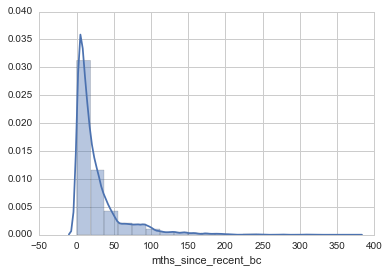

In [10]:
sns.distplot(sample_df['mths_since_recent_bc'], bins=20)

In [19]:
sample_df['mths_since_recent_bc'].describe()

count    5641.000000
mean       26.090587
std        33.521531
min         0.000000
25%         6.000000
50%        14.000000
75%        31.000000
max       373.000000
Name: mths_since_recent_bc, dtype: float64

In [7]:
del sample_df['id']

In [68]:
sample_df.head(1)

,Trans_loan_status,loan_amnt,Trans_term,int_rate,installment,annual_inc,Trans_verification_status,Trans_purpose,fico_range_low,fico_range_high,...,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens
0,0,1000,0,0.2343,38.94,106000.0,1,1,700,704,...,0,1,7,12,3,0,0,2,0,0


In [34]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm


In [25]:
#sns.factorplot('Trans_home_ownership', data=sample_df, hue='Trans_loan_status',palette='coolwarm')

In [21]:
sample_df['Trans_loan_status'].value_counts()

0    5093
1     548
Name: Trans_loan_status, dtype: int64

In [23]:
#sample_df['loan_amnt'].value_counts()

In [27]:
sample_df['Trans_home_ownership'].value_counts()

1    2539
3    2471
2     631
Name: Trans_home_ownership, dtype: int64

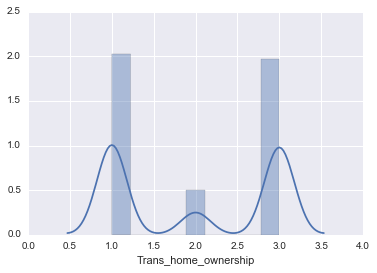

In [5]:
sns.distplot(sample_df['Trans_home_ownership'])

In [34]:
Y = sample_df.Trans_loan_status

In [36]:
X = sample_df
X = X.drop('Trans_loan_status',axis=1)

In [37]:
X.head(1)

,loan_amnt,Trans_term,int_rate,installment,Trans_home_ownership,annual_inc,Trans_verification_status,Trans_purpose,fico_range_low,fico_range_high,...,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens
0,1000,0,0.2343,38.94,1,106000,1,1,700,704,...,0,1,7,12,3,0,0,2,0,0


In [38]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Trans_loan_status, dtype: int64

In [39]:
Y= np.ravel(Y)

In [43]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

In [11]:
sample_df.head(1)

,Trans_loan_status,loan_amnt,Trans_term,int_rate,installment,annual_inc,Trans_verification_status,Trans_purpose,fico_range_low,fico_range_high,...,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens
0,0,1000,0,0.2343,38.94,106000.0,1,1,700,704,...,0,1,7,12,3,0,0,2,0,0


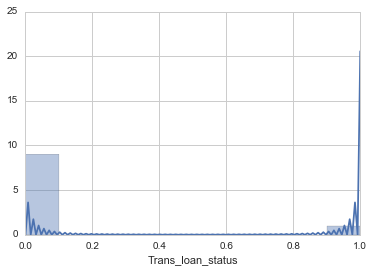

In [16]:
sns.distplot(sample_df['Trans_loan_status'], bins=10)

In [18]:
#Loan delinquency status 
sample_df['Trans_loan_status'].value_counts()

0    5093
1     548
Name: Trans_loan_status, dtype: int64

In [25]:
#sample_df.info()

In [24]:
#sample_df['revol_bal'].value_counts()

In [26]:
model_df = pd.read_csv("model.csv")

In [27]:
model_df.head(1)
#Y = mode_df['Trans_loan']

,Trans_loan_status,int_rate,fico_range_low,fico_range_high,inq_last_6mths,last_pymnt_amnt,acc_open_past_24mths
0,0,0.2343,700,704,2,38.94,3


In [29]:
Y = model_df['Trans_loan_status']
Y = np.ravel(Y)

Y

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
X = model_df

X = X.drop('Trans_loan_status', axis=1)

In [32]:
X.head()

,int_rate,fico_range_low,fico_range_high,inq_last_6mths,last_pymnt_amnt,acc_open_past_24mths
0,0.2343,700,704,2,38.94,3
1,0.1629,685,689,1,35.31,2
2,0.1922,660,664,0,36.77,1
3,0.1367,690,694,0,34.02,2
4,0.1448,675,679,1,34.42,6


In [37]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.90285410388229037

In [38]:
log_model.intercept_

array([ 0.0023985])

In [39]:
log_model.coef_

array([[ 0.19040422, -0.0137941 ,  0.0105469 ,  0.23030424, -0.00024042,
        -0.00880922]])

In [61]:
#log_model.predict()
x_new = [[0.24, 610, 650, 5, 2, 5]]
log_model.predict(x_new)

array([0])

In [47]:
model_df[model_df['Trans_loan_status'] > 0]['int_rate'].describe()


count    548.000000
mean       0.196397
std        0.040095
min        0.062400
25%        0.169900
50%        0.192200
75%        0.229900
max        0.289900
Name: int_rate, dtype: float64

In [48]:
model_df[model_df['Trans_loan_status'] > 0]['last_pymnt_amnt'].describe()

count      548.000000
mean       614.840401
std        668.251638
min          0.000000
25%        328.922500
50%        514.590000
75%        830.015000
max      13037.300000
Name: last_pymnt_amnt, dtype: float64

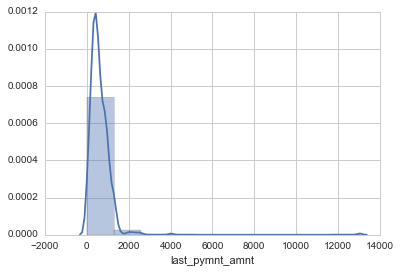

In [52]:
sns.distplot(model_df[model_df['Trans_loan_status'] > 0]['last_pymnt_amnt'], bins=10)

In [62]:
log_model.predict_log_proba(x_new)

array([[-0.51148151, -0.9153077 ]])

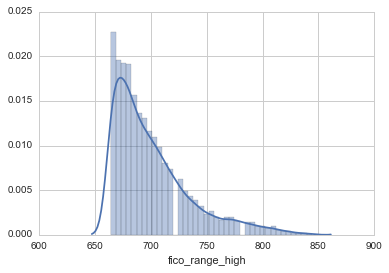

In [64]:
sns.distplot(model_df[model_df['Trans_loan_status'] < 1]['fico_range_high'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118a7a510>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118d08f50>], dtype=object)

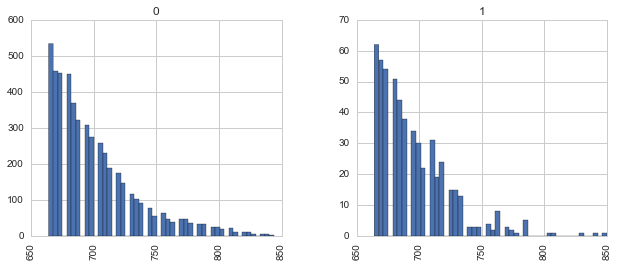

In [65]:
#Fico range high ---- by Trans_loan_status

model_df.hist(column='fico_range_high', by='Trans_loan_status', bins=50,figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118e31590>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11916b110>], dtype=object)

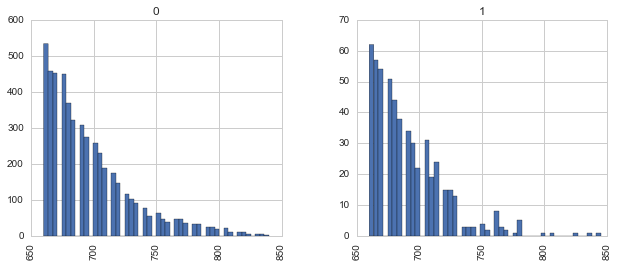

In [66]:
#Fico range low ---- by Trans_loan_status

model_df.hist(column='fico_range_low', by='Trans_loan_status', bins=50,figsize=(10,4))

In [70]:
# Building a model
#
#
# Create LogisticRegression model
log_model = LogisticRegression()

#Target variable
Y = model_df['Trans_loan_status']
Y = np.ravel(Y)

# Predictors 
X = model_df

X = X.drop('Trans_loan_status', axis=1)



In [71]:
# Fit our data
log_model.fit(X,Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
# Check our accuracy
log_model.score(X,Y)


0.90285410388229037